In [2]:
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
file_name = 'dados'
#b = bagreader('../bags/dados.bag')
b = bagreader('../bags/' + file_name + '.bag')

[INFO]  Data folder ../bags/dados already exists. Not creating.


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/clock,rosgraph_msgs/Clock,57289,1000.000000
1,/desired_trajectory,quad_ufabc/CartesianPointStamped,5620,100.000000
2,/gazebo/link_states,gazebo_msgs/LinkStates,57159,NaN
3,/gazebo/model_states,gazebo_msgs/ModelStates,57172,1000.000000
4,/gazebo/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
5,/gazebo/parameter_updates,dynamic_reconfigure/Config,1,NaN
6,/gazebo/performance_metrics,gazebo_msgs/PerformanceMetrics,569,9.900990
7,/quad/control/attitude_controller_error,quad_ufabc/AttitudeControllerErrorStamped,5620,100.000000
8,/quad/control/attitude_controller_output,quad_ufabc/AttitudeControllerOutputStamped,5620,100.000000
9,/quad/control/position_controller_output,quad_ufabc/PositionControllerOutputStamped,5704,100.000000


In [5]:
# Trajetória desejada topic -> pandas database
des_traj = b.message_by_topic(topic='/desired_trajectory')
des_traj_df = pd.read_csv(des_traj)
des_traj_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,cartesian_point.pose.position.x,cartesian_point.pose.position.y,cartesian_point.pose.position.z,cartesian_point.pose.orientation.w,cartesian_point.pose.orientation.x,...,cartesian_point.velocity.linear.z,cartesian_point.velocity.angular.x,cartesian_point.velocity.angular.y,cartesian_point.velocity.angular.z,cartesian_point.acceleration.linear.x,cartesian_point.acceleration.linear.y,cartesian_point.acceleration.linear.z,cartesian_point.acceleration.angular.x,cartesian_point.acceleration.angular.y,cartesian_point.acceleration.angular.z
0,94.971,85,94,971000000,NaN,0.599527,-0.000065,0.008266,0.999886,0.0,...,3.630691e-02,0.0,0.0,0.0,-6.026988e-03,-0.000790,0.113475,0.0,0.0,0.0
1,94.981,86,94,981000000,NaN,0.599506,-0.000068,0.008635,0.999881,0.0,...,3.745177e-02,0.0,0.0,0.0,-6.118965e-03,-0.000801,0.115497,0.0,0.0,0.0
2,94.991,87,94,991000000,NaN,0.599485,-0.000070,0.009015,0.999876,0.0,...,3.861685e-02,0.0,0.0,0.0,-6.210449e-03,-0.000812,0.117521,0.0,0.0,0.0
3,95.001,88,95,1000000,NaN,0.599463,-0.000073,0.009407,0.999870,0.0,...,3.980219e-02,0.0,0.0,0.0,-6.301414e-03,-0.000823,0.119547,0.0,0.0,0.0
4,95.011,89,95,11000000,NaN,0.599441,-0.000076,0.009811,0.999865,0.0,...,4.100781e-02,0.0,0.0,0.0,-6.391831e-03,-0.000833,0.121576,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,151.121,5700,151,121000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
5616,151.131,5701,151,131000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
5617,151.141,5702,151,141000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0
5618,151.151,5703,151,151000000,NaN,2.000000,1.000000,2.000000,1.000000,0.0,...,-1.137778e-08,0.0,0.0,0.0,5.211790e-08,-0.000005,0.000003,0.0,0.0,0.0


In [6]:
list(des_traj_df)

['Time',
 'header.seq',
 'header.stamp.secs',
 'header.stamp.nsecs',
 'header.frame_id',
 'cartesian_point.pose.position.x',
 'cartesian_point.pose.position.y',
 'cartesian_point.pose.position.z',
 'cartesian_point.pose.orientation.w',
 'cartesian_point.pose.orientation.x',
 'cartesian_point.pose.orientation.y',
 'cartesian_point.pose.orientation.z',
 'cartesian_point.pose.euler_orientation.phi',
 'cartesian_point.pose.euler_orientation.theta',
 'cartesian_point.pose.euler_orientation.psi',
 'cartesian_point.velocity.linear.x',
 'cartesian_point.velocity.linear.y',
 'cartesian_point.velocity.linear.z',
 'cartesian_point.velocity.angular.x',
 'cartesian_point.velocity.angular.y',
 'cartesian_point.velocity.angular.z',
 'cartesian_point.acceleration.linear.x',
 'cartesian_point.acceleration.linear.y',
 'cartesian_point.acceleration.linear.z',
 'cartesian_point.acceleration.angular.x',
 'cartesian_point.acceleration.angular.y',
 'cartesian_point.acceleration.angular.z']

In [7]:
# Tópico "posição atual" do filtro de Kalman -> pandas databse
actual_pos = b.message_by_topic(topic='/quad/kf/position')
actual_pos_df = pd.read_csv(actual_pos)
actual_pos_df

,Time,x,y,z
0,93.995,0.600004,0.000004,0.005902
1,93.996,0.600004,0.000004,0.005902
2,93.997,0.600004,0.000004,0.005903
3,93.998,0.600004,0.000005,0.005903
4,93.999,0.600004,0.000005,0.005903
...,...,...,...,...
57166,151.161,2.000000,0.999998,1.963272
57167,151.162,2.000000,0.999998,1.963272
57168,151.163,2.000000,0.999998,1.963272
57169,151.164,2.000000,0.999998,1.963272


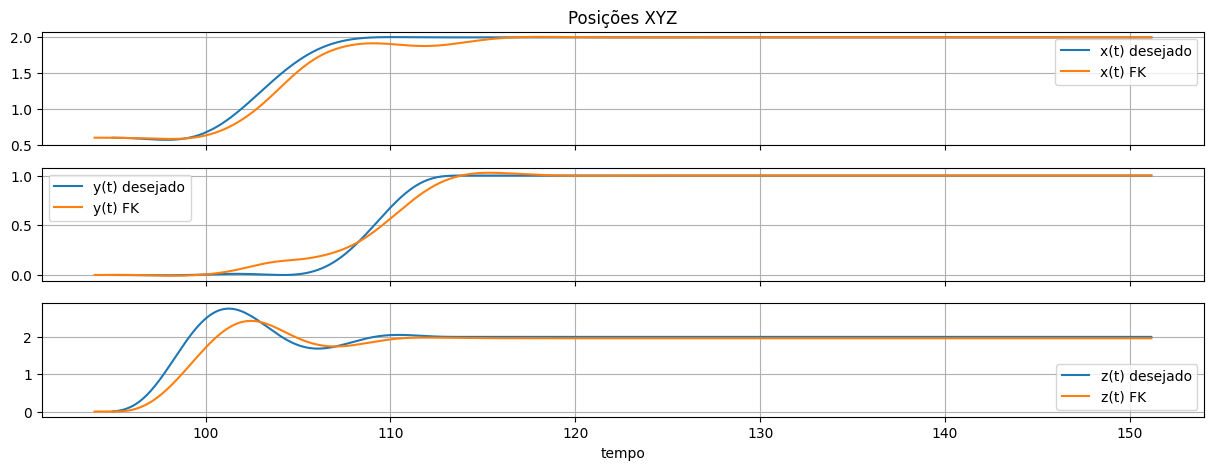

In [8]:
# gráfico das Posições
plt.subplot(3,1,1)
plt.title('Posições XYZ')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.x'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['x'].to_numpy())
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()
plt.legend(['x(t) desejado','x(t) FK'])
plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.y'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['y'].to_numpy())
plt.legend(['y(t) desejado','y(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()
plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.position.z'].to_numpy())
plt.plot(actual_pos_df['Time'].to_numpy(), actual_pos_df['z'].to_numpy())
plt.legend(['z(t) desejado','z(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()

In [9]:
# tópico "velocidades lineares" -> pandas database 
actual_vel_lin = b.message_by_topic(topic='/quad/kf/vel_lin')
actual_vel_lin_df = pd.read_csv(actual_vel_lin)
actual_vel_lin_df

,Time,x,y,z
0,93.996,4.196364e-05,4.660645e-05,2.025189e-04
1,93.997,4.224761e-05,4.685399e-05,2.002778e-04
2,93.998,4.253412e-05,4.710031e-05,1.980607e-04
3,93.999,4.282289e-05,4.734580e-05,1.958674e-04
4,94.000,4.311363e-05,4.759088e-05,1.936976e-04
...,...,...,...,...
57165,151.161,-2.060014e-09,-2.359803e-08,2.010742e-10
57166,151.162,-2.070579e-09,-2.352991e-08,1.113690e-10
57167,151.163,-2.078466e-09,-2.353375e-08,1.130503e-10
57168,151.164,-2.083739e-09,-2.360951e-08,2.345487e-11


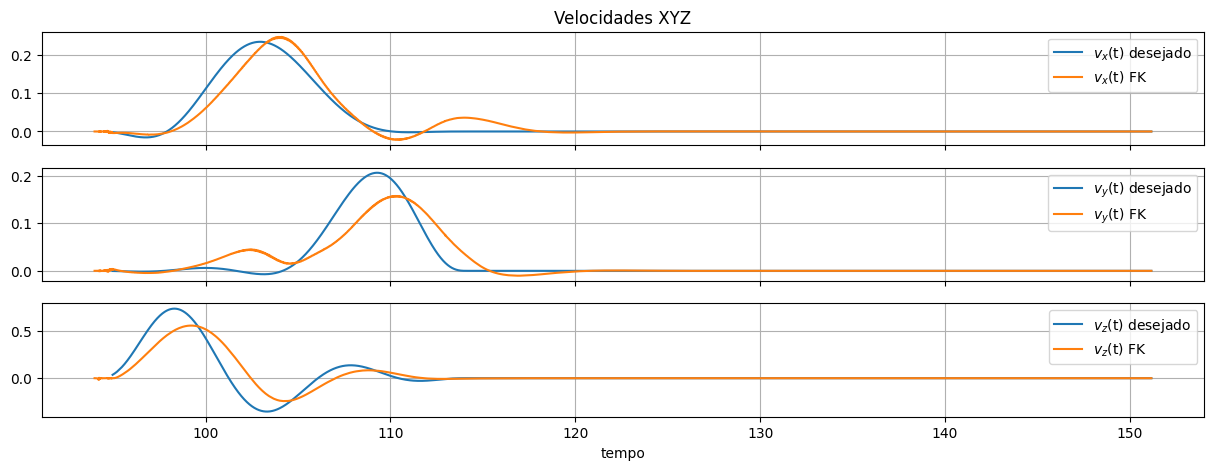

In [10]:
# gráfico das Velocidades
plt.subplot(3,1,1)
plt.title('Velocidades XYZ')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.x'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['x'].to_numpy())
plt.legend(['$v_x$(t) desejado','$v_x$(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.y'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['y'].to_numpy())
plt.legend(['$v_y$(t) desejado','$v_y$(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.linear.z'].to_numpy())
plt.plot(actual_vel_lin_df['Time'].to_numpy(), actual_vel_lin_df['z'].to_numpy())
plt.legend(['$v_z$(t) desejado','$v_z$(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()
#mpld3.show()


In [11]:
# Topico "atitude" -> pandas database
actual_ati = b.message_by_topic(topic='/quad/kf/attitude')
actual_ati_df = pd.read_csv(actual_ati)
actual_ati_df

,Time,x,y,z,w
0,93.995,-1.651437e-05,1.993237e-05,0.000019,1.0
1,93.996,-1.656757e-05,1.998545e-05,0.000019,1.0
2,93.997,-1.662125e-05,2.003833e-05,0.000019,1.0
3,93.998,-1.667540e-05,2.009103e-05,0.000019,1.0
4,93.999,-1.672998e-05,2.014358e-05,0.000019,1.0
...,...,...,...,...,...
57166,151.161,1.389486e-09,-1.985911e-09,0.000002,1.0
57167,151.162,1.389475e-09,-1.985573e-09,0.000002,1.0
57168,151.163,1.389277e-09,-1.985445e-09,0.000002,1.0
57169,151.164,1.387891e-09,-1.985559e-09,0.000002,1.0


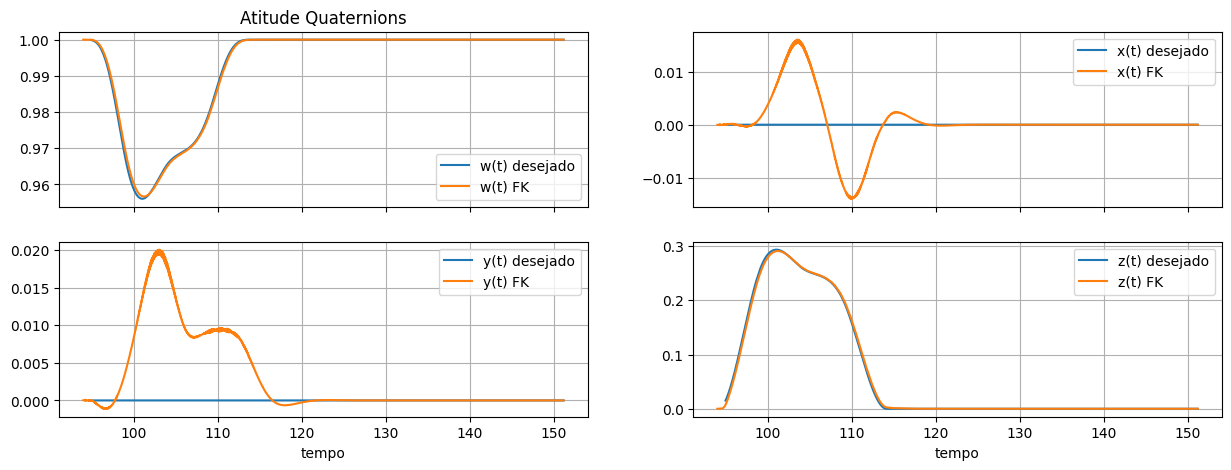

In [12]:
# gráficos da Pose
plt.subplot(2,2,1)
plt.title('Atitude Quaternions')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.w'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['w'].to_numpy())
plt.legend(['w(t) desejado','w(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(2,2,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.x'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['x'].to_numpy())
plt.legend(['x(t) desejado','x(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(2,2,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.y'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['y'].to_numpy())
plt.legend(['y(t) desejado','y(t) FK'])
plt.grid()
plt.xlabel('tempo')

plt.subplot(2,2,4)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.orientation.z'].to_numpy())
plt.plot(actual_ati_df['Time'].to_numpy(), actual_ati_df['z'].to_numpy())
plt.legend(['z(t) desejado','z(t) FK'])
plt.grid()
plt.xlabel('tempo')

plt.show()

In [13]:
# tópico "atitude em euler" -> pandas database
actual_ati_euler = b.message_by_topic(topic='/quad/kf/euler')
actual_ati_euler_df = pd.read_csv(actual_ati_euler)
actual_ati_euler_df

,Time,phi,theta,psi
0,93.995,-3.302800e-05,3.986536e-05,0.000038
1,93.996,-3.313438e-05,3.997153e-05,0.000038
2,93.997,-3.324174e-05,4.007729e-05,0.000038
3,93.998,-3.335003e-05,4.018269e-05,0.000038
4,93.999,-3.345919e-05,4.028780e-05,0.000038
...,...,...,...,...
57166,151.161,2.778966e-09,-3.971827e-09,0.000003
57167,151.162,2.778945e-09,-3.971151e-09,0.000003
57168,151.163,2.778548e-09,-3.970895e-09,0.000003
57169,151.164,2.775776e-09,-3.971122e-09,0.000003


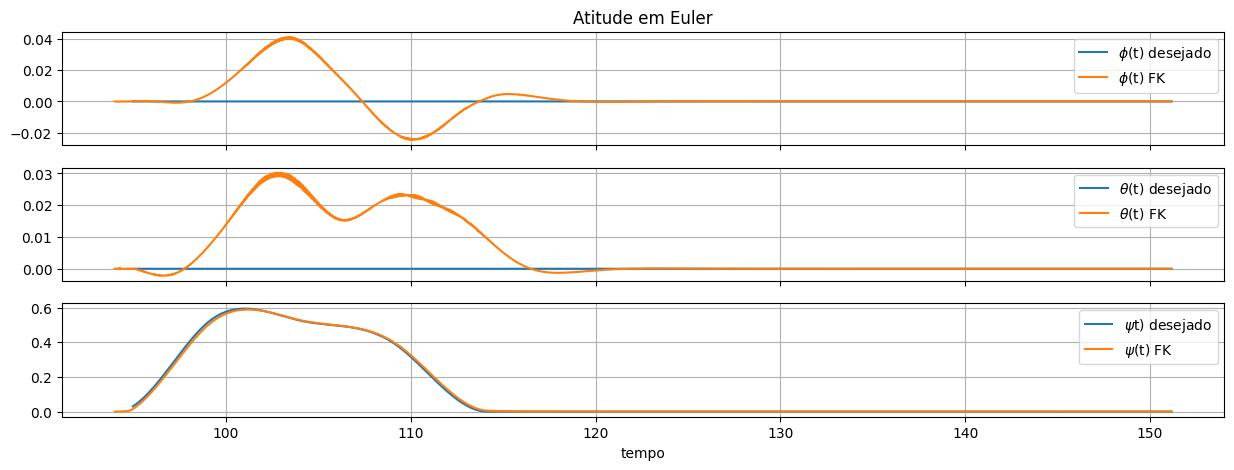

In [14]:
# Gráficos de Atitude em ầngulos de Euler
plt.subplot(3,1,1)
plt.title('Atitude em Euler')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.phi'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['phi'].to_numpy())
plt.legend(['$\phi$(t) desejado','$\phi$(t) FK'])
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.theta'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['theta'].to_numpy())
plt.legend(['$\\theta$(t) desejado','$\\theta$(t) FK'])
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
#frame2.axes.get_xaxis().set_visible(False)
#frame2.axes.get_xaxis().set_visible(False)
plt.grid()

plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.pose.euler_orientation.psi'].to_numpy())
plt.plot(actual_ati_euler_df['Time'].to_numpy(), actual_ati_euler_df['psi'].to_numpy())
plt.legend(['$\psi$t) desejado','$\psi$(t) FK'])
plt.grid()
plt.xlabel('tempo')
plt.show()

In [15]:
# tópico "velocidades angulares" -> pandas database 
actual_vel_ang = b.message_by_topic(topic='/quad/kf/vel_ang')
actual_vel_ang_df = pd.read_csv(actual_vel_ang)
actual_vel_ang_df

,Time,x,y,z
0,93.996,-1.063838e-04,1.061708e-04,1.661704e-04
1,93.997,-1.073667e-04,1.057552e-04,1.664254e-04
2,93.998,-1.082943e-04,1.053977e-04,1.666203e-04
3,93.999,-1.091578e-04,1.051008e-04,1.667540e-04
4,94.000,-1.099491e-04,1.048667e-04,1.668260e-04
...,...,...,...,...
57165,151.161,-1.652839e-09,1.034827e-09,2.832897e-09
57166,151.162,-2.145493e-11,6.764727e-10,2.828097e-09
57167,151.163,-3.963755e-10,2.552844e-10,2.878009e-09
57168,151.164,-2.772082e-09,-2.270292e-10,2.581021e-09


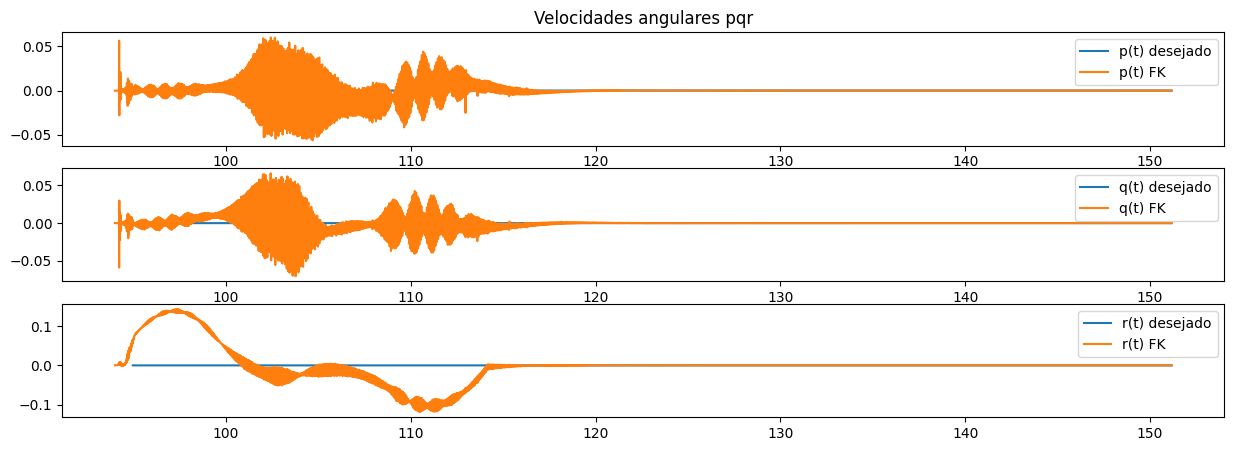

In [16]:
# Angular Twist
# Velocidades angulares (p,q,r) desejadas-> pandas database
# A velocidade angular desejada é dada em rad/s no sistema de coordenadas do corpo NÃO está sendo produtecido pelo gerador de trajetória.
plt.subplot(3,1,1)
plt.title('Velocidades angulares pqr')
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.x'].to_numpy(), label='p(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['x'].to_numpy(), label='p(t) FK')
plt.legend()
plt.subplot(3,1,2)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.y'].to_numpy(), label='q(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['y'].to_numpy(), label='q(t) FK')
plt.legend()
plt.subplot(3,1,3)
plt.plot(des_traj_df['Time'].to_numpy(), des_traj_df['cartesian_point.velocity.angular.z'].to_numpy(), label='r(t) desejado')
plt.plot(actual_vel_ang_df['Time'].to_numpy(), actual_vel_ang_df['z'].to_numpy(), label='r(t) FK')
plt.legend()
plt.show()

In [17]:
# saída do controle de posição e velocidade
pos_control_output = b.message_by_topic(topic='/quad/control/position_controller_output')
pos_control_output_df = pd.read_csv(pos_control_output)
pos_control_output_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,position_controller_output.thrust.num,position_controller_output.orientation_set_point.w,position_controller_output.orientation_set_point.x,position_controller_output.orientation_set_point.y,position_controller_output.orientation_set_point.z,position_controller_output.euler_set_point.phi,position_controller_output.euler_set_point.theta,position_controller_output.euler_set_point.psi
0,94.141,1,94,141000000,NaN,10.065872,1.0,1.501773e-06,-1.385456e-06,0.000002,3.003539e-06,-2.770919e-06,0.000005
1,94.141,2,94,141000000,NaN,10.065949,1.0,1.534940e-06,-1.616540e-06,0.000009,3.069850e-06,-3.233108e-06,0.000018
2,94.151,3,94,151000000,NaN,10.066131,1.0,1.681011e-06,-2.077543e-06,0.000021,3.361936e-06,-4.155156e-06,0.000041
3,94.162,4,94,161000000,NaN,10.066649,1.0,1.876301e-06,-2.716017e-06,0.000037,3.752403e-06,-5.432172e-06,0.000073
4,94.171,5,94,171000000,NaN,10.067365,1.0,2.074497e-06,-3.489742e-06,0.000057,4.148594e-06,-6.979721e-06,0.000114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,151.121,5700,151,121000000,NaN,10.417242,1.0,7.973707e-10,-3.693361e-09,0.000002,1.594729e-09,-7.386724e-09,0.000003
5700,151.131,5701,151,131000000,NaN,10.417242,1.0,7.706748e-10,-3.691494e-09,0.000002,1.541338e-09,-7.382990e-09,0.000003
5701,151.141,5702,151,141000000,NaN,10.417242,1.0,7.488488e-10,-3.689958e-09,0.000002,1.497686e-09,-7.379919e-09,0.000003
5702,151.151,5703,151,151000000,NaN,10.417242,1.0,7.223826e-10,-3.688009e-09,0.000002,1.444753e-09,-7.376020e-09,0.000003


In [18]:
# Saída do controle de atitude
ati_control_output = b.message_by_topic(topic='/quad/control/attitude_controller_output')
ati_control_output_df = pd.read_csv(ati_control_output)
ati_control_output_df

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,torques.x,torques.y,torques.z
0,94.972,85,94,971000000,NaN,-1.898248e-04,2.021986e-03,1.760461e-02
1,94.983,86,94,982000000,NaN,1.356739e-03,-2.214935e-03,1.894941e-02
2,94.992,87,94,991000000,NaN,3.028243e-03,-6.409825e-04,1.642685e-02
3,95.002,88,95,1000000,NaN,9.036697e-04,-2.025094e-03,1.884569e-02
4,95.012,89,95,11000000,NaN,6.360190e-04,-1.925164e-03,1.736485e-02
...,...,...,...,...,...,...,...,...
5615,151.122,5700,151,121000000,NaN,-4.266327e-09,-1.803138e-09,1.897917e-09
5616,151.132,5701,151,131000000,NaN,-1.103480e-09,-2.699950e-09,2.368741e-09
5617,151.142,5702,151,142000000,NaN,-1.033495e-09,-3.125820e-09,6.884364e-10
5618,151.152,5703,151,151000000,NaN,-5.381866e-09,-4.161860e-09,-1.515712e-09


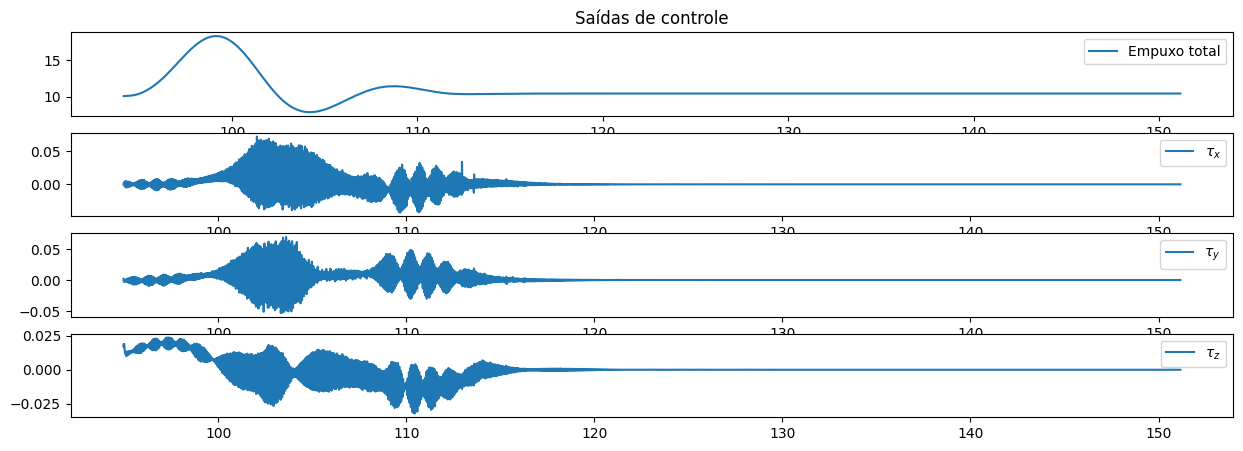

In [19]:
# Saídas de controle
plt.subplot(4,1,1)
plt.title('Saídas de controle')
plt.plot(pos_control_output_df['Time'].to_numpy(),\
    pos_control_output_df['position_controller_output.thrust.num'].to_numpy(),\
        linewidth=1.5, label='Empuxo total')
plt.legend()
plt.subplot(4,1,2)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.x'].to_numpy(),\
        linewidth=1.5, label='$\\tau_x$')
plt.legend()
plt.subplot(4,1,3)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.y'].to_numpy(),\
        linewidth=1.5, label='$\\tau_y$')
plt.legend()
plt.subplot(4,1,4)
plt.plot(ati_control_output_df['Time'].to_numpy(),\
    ati_control_output_df['torques.z'].to_numpy(),\
        linewidth=1.5, label='$\\tau_z$')
plt.legend()
plt.show()

In [20]:
# Relação entre ângulos de Euler e velocidades angulares
t = actual_ati_euler_df['Time'].to_numpy()
phi = actual_ati_euler_df['phi'].to_numpy()
theta = actual_ati_euler_df['theta'].to_numpy()
psi = actual_ati_euler_df['psi'].to_numpy()
p = actual_vel_ang_df['x'].to_numpy()
q = actual_vel_ang_df['y'].to_numpy()
r = actual_vel_ang_df['z'].to_numpy()
from scipy import integrate
phi_int = integrate.cumtrapz(p, t, initial=0)
theta_int = integrate.cumtrapz(q, t, initial=0)
psi_int = integrate.cumtrapz(r, t, initial=0)


ValueError: If given, length of x along axis must be the same as y.

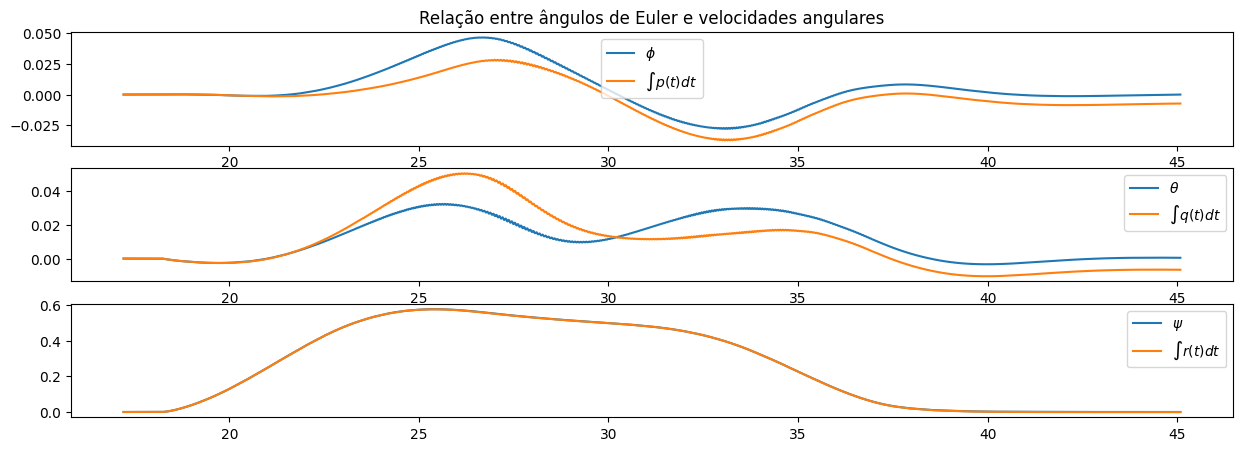

In [ ]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi,label='$\phi$')
plt.plot(t,phi_int,label='$\int p(t)dt$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta,label='$\\theta$')
plt.plot(t,theta_int,label='$\int q(t)dt$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi,label='$\psi$')
plt.plot(t,psi_int,label='$\int r(t)dt$')
plt.legend()
plt.show()

# Filtering prject

In [ ]:
import numpy as np

In [ ]:
phi_der = np.zeros(len(t))
theta_der = np.zeros(len(t))
psi_der = np.zeros(len(t))
for i in range(1,len(t)):
    W = np.array([[1,0,-np.sin(theta[i])],
              [0,np.cos(phi[i]),np.sin(phi[i])*np.cos(theta[i])],
              [0,-np.sin(phi[i]),np.cos(phi[i])*np.cos(theta[i])]])
    W_inv = np.linalg.inv(W)
    pqr = np.array([p[i],q[i],r[i]]).T
    euler_rates = np.dot(W_inv,pqr.T).T
    #print(euler_rates)
    phi_der[i] = euler_rates[0]
    theta_der[i] = euler_rates[1]
    psi_der[i] = euler_rates[2]

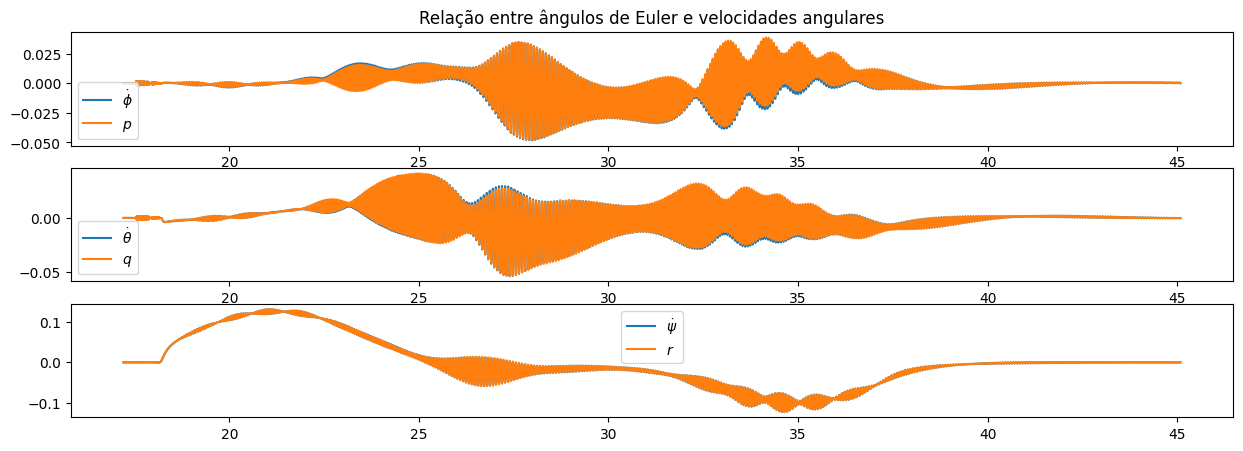

In [ ]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi_der,label='$\dot\phi$')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta_der,label='$\dot\\theta$')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi_der,label='$\dot\psi$')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

In [ ]:
phi_der_2 = np.gradient(phi, t)
theta_der_2 = np.gradient(theta, t)
psi_der_2 = np.gradient(psi, t)

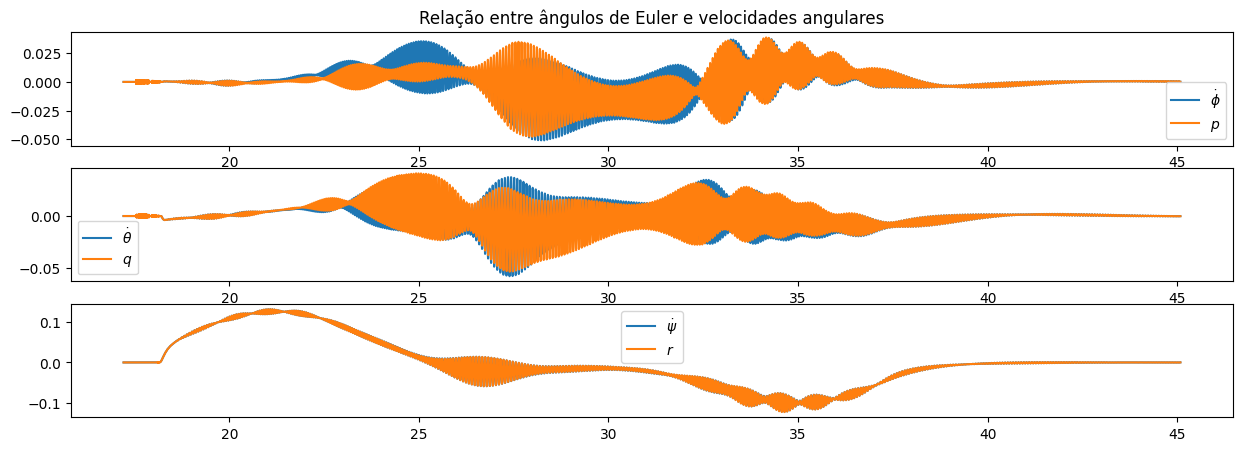

In [ ]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,phi_der_2,label='$\dot\phi$')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,theta_der_2,label='$\dot\\theta$')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,psi_der_2,label='$\dot\psi$')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

In [ ]:
p_2=np.zeros(len(t))
q_2=np.zeros(len(t))
r_2=np.zeros(len(t))

for i in range(1,len(t)):
    W = np.array([[1,0,-np.sin(theta[i])],
              [0,np.cos(phi[i]),np.sin(phi[i])*np.cos(theta[i])],
              [0,-np.sin(phi[i]),np.cos(phi[i])*np.cos(theta[i])]])
    euler_der = np.array([phi_der_2[i],theta_der_2[i],psi_der_2[i]]).T
    pqr_2 = np.dot(W,euler_der.T).T
    p_2[i] = pqr_2[0]
    q_2[i] = pqr_2[1]
    r_2[i] = pqr_2[2]

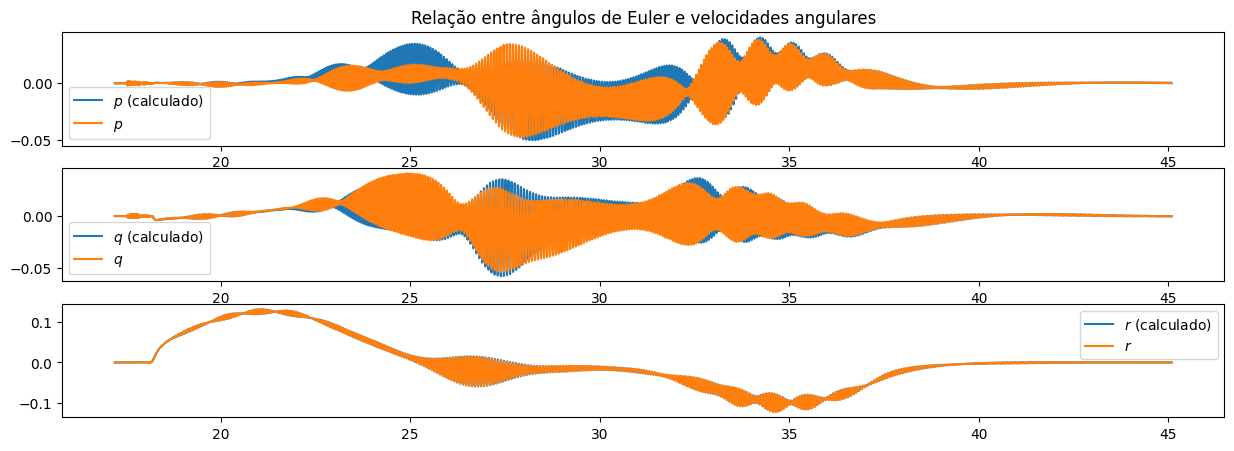

In [ ]:
plt.subplot(3,1,1)
plt.title('Relação entre ângulos de Euler e velocidades angulares')
plt.plot(t,p_2,label='$p$ (calculado)')
plt.plot(t,p,label='$p$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,q_2,label='$q$ (calculado)')
plt.plot(t,q,label='$q$')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,r_2,label='$r$ (calculado)')
plt.plot(t,r,label='$r$')
plt.legend()
plt.show()

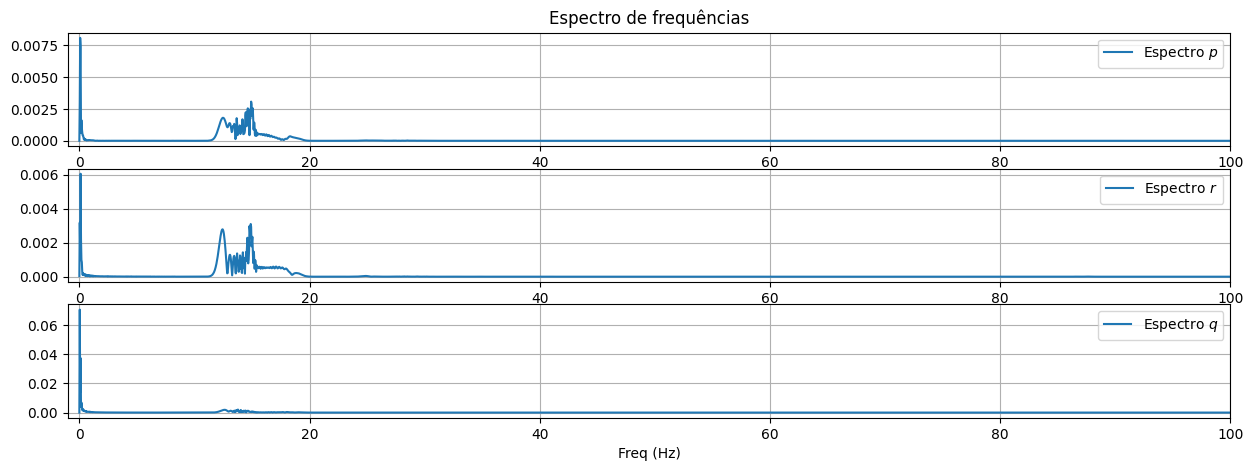

In [ ]:
# Espectro de frequências
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(t)
# sample spacing
T = t[1]-t[0]
yp = phi_der_2
ypf = fft(yp)
xf = fftfreq(N, T)[:N//2]
#
yr = theta_der_2
yrf = fft(yr)
#
yq = psi_der_2
yqf = fft(yq)
#
plt.subplot(3,1,1)
plt.title('Espectro de frequências')
plt.plot(xf, 2.0/N * np.abs(ypf[0:N//2]),label='Espectro $p$')
plt.xlim(-1,100)
plt.grid()
plt.legend()
plt.subplot(3,1,2)
plt.plot(xf, 2.0/N * np.abs(yrf[0:N//2]),label='Espectro $r$')
plt.xlim(-1,100)
plt.grid()
plt.legend()
plt.subplot(3,1,3)
plt.plot(xf, 2.0/N * np.abs(yqf[0:N//2]),label='Espectro $q$')
plt.xlim(-1,100)
plt.xlabel('Freq (Hz)')
plt.grid()
plt.legend()
plt.show()

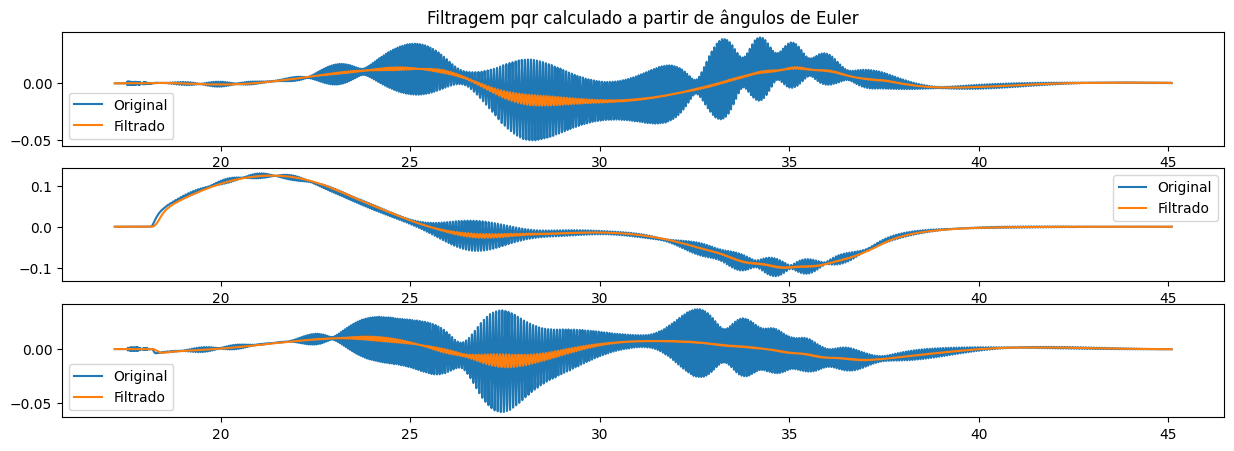

In [ ]:
# Filtering
from scipy.signal import butter, lfilter, freqz
n=200
b = [1.0 / n] * n
a = 1
yyp = lfilter(b, a, phi_der_2)
yyq = lfilter(b, a, theta_der_2)
yyr = lfilter(b, a, psi_der_2)
#
plt.subplot(3,1,1)
plt.title('Filtragem pqr calculado a partir de ângulos de Euler')
plt.plot(t, p_2, label='Original')
plt.plot(t, yyp, label='Filtrado')
plt.legend()
plt.subplot(3,1,2)
yyr = lfilter(b, a, r_2)
plt.plot(t, r_2, label='Original')
plt.plot(t, yyr, label='Filtrado')
plt.legend()
plt.subplot(3,1,3)
yyq = lfilter(b, a, q_2)
plt.plot(t, q_2, label='Original')
plt.plot(t, yyq, label='Filtrado')
plt.legend()
plt.show()

In [ ]:
# Low pass filter
from scipy import signal
b, a = signal.butter(4, 0.01)

In [ ]:
p_filtered = signal.lfilter(b, a, phi_der_2)
q_filtered = signal.lfilter(b, a, theta_der_2)
r_filtered = signal.lfilter(b, a, psi_der_2)

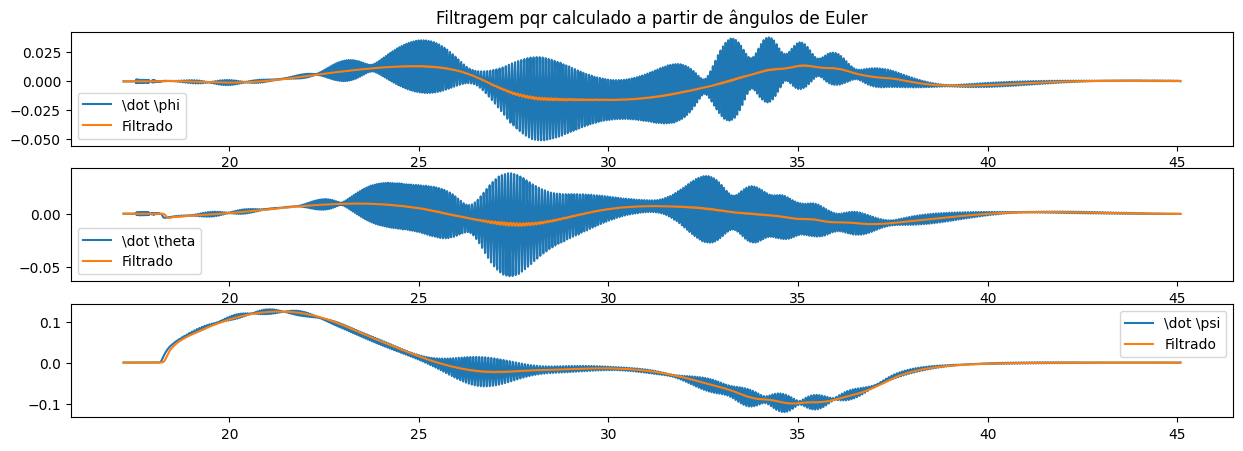

In [ ]:
plt.subplot(3,1,1)
plt.title('Filtragem pqr calculado a partir de ângulos de Euler')
plt.plot(t, phi_der_2, label='\dot \phi')
plt.plot(t, p_filtered, label='Filtrado')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t, theta_der_2, label='\dot \\theta')
plt.plot(t, q_filtered, label='Filtrado')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t, psi_der_2, label='\dot \psi')
plt.plot(t, r_filtered, label='Filtrado')
plt.legend()
plt.show()
  

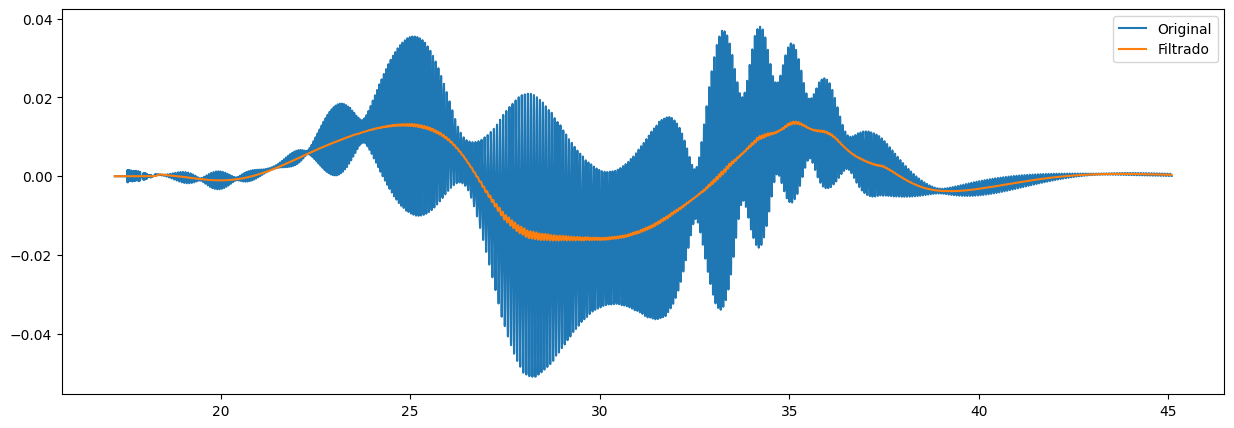

In [ ]:
# Filtering a sequence of angles rates values
def butterworth_filter_single_sample(sample, prev_samples, b, a, max_length):
    # Append the new sample to the previous samples
    prev_samples.append(sample)
    
    # Truncate the previous samples to the maximum length
    prev_samples = prev_samples[-max_length:]
    
    # Apply the filter to the updated sequence
    filtered_sample = lfilter(b, a, prev_samples)[-1]
    
    return filtered_sample, prev_samples

# Set filter parameters
cutoff_frequency = 5 # Hz
sample_rate = 1000  # Hz
order = 4
# Design the filter
nyquist_freq = 0.5 * sample_rate
normal_cutoff = cutoff_frequency / nyquist_freq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
# Initialize variables for sequential filtering
filtered_signal_seq = []
prev_samples = []
# Maximum length of the previous samples
max_length = 500

# Apply the Butterworth filter sequentially
for sample in phi_der_2:
    filtered_sample, prev_samples = \
    butterworth_filter_single_sample(sample, prev_samples, b, a, max_length)
    filtered_signal_seq.append(filtered_sample)
    
plt.plot(t, phi_der_2, label='Original')
plt.plot(t, filtered_signal_seq, label='Filtrado')
plt.legend()
plt.show()

In [ ]:
normal_cutoff

0.01

In [ ]:
a

array([ 1.        , -3.91790787,  5.75707638, -3.76034951,  0.92118193])